In [1]:
%matplotlib inline
from __future__ import print_function, division
from neuralnilm.source import RandomSegments, RandomSegmentsInMemory, SameLocation
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np
from sys import stdout

In [16]:
source = SameLocation(
    filename='/data/mine/vadeec/merged/ukdale.h5',
    target_appliance='washer dryer',
    window=("2013-03-18", "2013-04-18"),
    seq_length=1200,
    train_buildings=[1],
    validation_buildings=[1],
    n_seq_per_batch=2,
    standardise_input=True,
    standardise_targets=True
    #offset_probability=0.5,
    #ignore_offset_activations=True
)

Loaded 26 activations.
Loaded 26 activations.


INFO:neuralnilm.source:Loaded 26 activations.


Loaded mains data for building 1.
Loaded mains data for building 1.


INFO:neuralnilm.source:Loaded mains data for building 1.


In [18]:
def plot_data(X, y, seq_i=0):
    fig, axes = plt.subplots(nrows=2, sharex=True)
    axes[0].plot(y[seq_i, :, 0])
    axes[1].plot(X[seq_i, :, 0])
    plt.show()

In [29]:
X_val, y_val = source.validation_data()

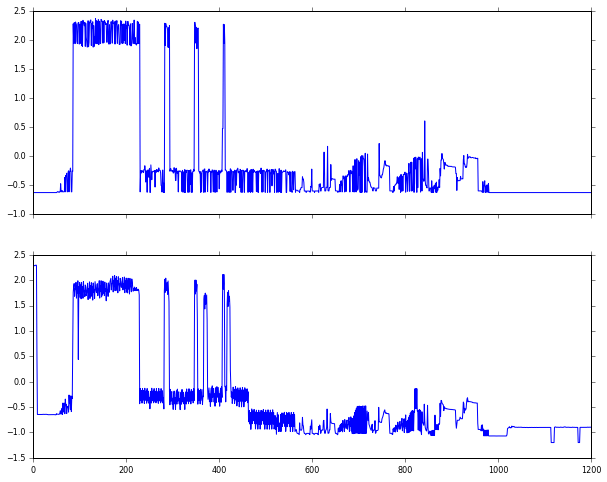

In [30]:
plot_data(X_val, y_val, 1)

In [39]:
source.start()

In [10]:
X, y = source.queue.get(timeout=5)

In [18]:
i = 0
while True:
    print("\r", i, end="")
    stdout.flush()
    X, y = source.queue.get(timeout=5)
    if (X[0] == X_val[0]).all():
        print("ahhh!")
        break
    i += 1

 168629

KeyboardInterrupt: 

In [23]:
source.activations[1][0].astype(np.float32)

2013-03-18 00:00:00+00:00    0
2013-03-18 00:00:06+00:00    0
2013-03-18 00:00:12+00:00    0
2013-03-18 00:00:18+00:00    0
2013-03-18 00:00:24+00:00    0
2013-03-18 00:00:30+00:00    0
2013-03-18 00:00:36+00:00    0
2013-03-18 00:00:42+00:00    0
2013-03-18 00:00:48+00:00    0
2013-03-18 00:00:54+00:00    0
2013-03-18 00:01:00+00:00    0
2013-03-18 00:01:06+00:00    0
2013-03-18 00:01:12+00:00    0
2013-03-18 00:01:18+00:00    0
2013-03-18 00:01:24+00:00    0
2013-03-18 00:01:30+00:00    0
2013-03-18 00:01:36+00:00    0
2013-03-18 00:01:42+00:00    0
2013-03-18 00:01:48+00:00    0
2013-03-18 00:01:54+00:00    0
2013-03-18 00:02:00+00:00    0
2013-03-18 00:02:06+00:00    0
2013-03-18 00:02:12+00:00    0
2013-03-18 00:02:18+00:00    0
2013-03-18 00:02:24+00:00    0
2013-03-18 00:02:30+00:00    0
2013-03-18 00:02:36+00:00    0
2013-03-18 00:02:42+00:00    0
2013-03-18 00:02:48+00:00    0
2013-03-18 00:02:54+00:00    0
                            ..
2013-03-18 00:46:42+00:00    0
2013-03-

In [6]:
source.dataset.buildings[1].elec['washer dryer'].dominant_appliance().type

{'categories': {'electrical': ['single-phase induction motor', 'resistive'],
  'google_shopping': ['laundry appliances'],
  'size': 'large',
  'traditional': 'wet'},
 'components': [{'categories': {'electrical': ['single-phase induction motor']},
   'description': 'drum motor',
   'n_ancestors': 1,
   'parent': 'component',
   'type': 'motor'},
  {'categories': {'electrical': ['single-phase induction motor']},
   'n_ancestors': 2,
   'parent': 'motor',
   'type': 'water pump'},
  {'additional_properties': {'volume': {'description': 'litres',
     'type': 'number'}},
   'categories': {'electrical': ['resistive']},
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric water heater'},
  {'categories': {'electrical': ['resistive']},
   'description': 'clothes drying heating element',
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric air heater'}],
 'control': ['manual', 'timer'],
 'distributions': {'rooms': [{'distance': 3,
    

In [9]:
min([a.index[-1] - a.index[0] for a in source.activations[1]])

Timedelta('0 days 00:07:42')

In [46]:
(2*60*60) / 6

1200.0